<a href="https://colab.research.google.com/github/wakii/ds_parrot/blob/master/titanic_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Jupyter notebook에서 실행할 시, 주석을 해제하고 설치해주세요.
# !pip install sklearn
# !pip install lightgbm
# 제공된 링크에 따라 xgboost 설치

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
raw_data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [0]:
# Survived : 생존여부(1: 생존, 0 : 사망)
# Pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
# Name : 승객 이름
# Sex : 승객 성별
# Age : 승객 나이
# SibSp : 동반한 형제자매, 배우자 수
# Parch : 동반한 부모, 자식 수
# Ticket : 티켓의 고유 넘버
# Fare 티켓의 요금
# Cabin : 객실 번호
# Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

In [0]:
raw_data['sex'] = raw_data['sex'].replace(['female','male'], [0,1])
raw_data[['survived', 'pclass', 'sibsp', 'parch', 'fare']] = raw_data[['survived', 'pclass', 'sibsp', 'parch', 'fare']].apply(pd.to_numeric)
raw_data = raw_data[raw_data['age'] != '']

raw_data.info() # 여러 번 하면 이미 바뀐 상태라 오류

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int64  
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [0]:
raw_data = raw_data[['survived', 'pclass','sex','age','sibsp','parch','fare']].dropna()
train_pre = raw_data[['pclass','sex','age','sibsp','parch','fare']].dropna()

train_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1045 non-null   int64  
 1   sex     1045 non-null   int64  
 2   age     1045 non-null   float64
 3   sibsp   1045 non-null   int64  
 4   parch   1045 non-null   int64  
 5   fare    1045 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 57.1 KB


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier, plot_importance
from sklearn.metrics import accuracy_score

#Regression 문제의 경우, RandomForestRegressor, XGBRegressor, LGBMRregressor로 import 가능
x_train, x_test, y_train, y_test = train_test_split(train_pre, raw_data[['survived']], test_size=0.2, random_state=13)

In [0]:
tree = DecisionTreeClassifier(max_depth=3, random_state=123457)
tree.fit(x_train, y_train)

train_score = tree.score(x_train, y_train)
test_score = tree.score(x_test, y_test)

predict_y = tree.predict(x_test) # x_train을 넣은 결과가 y_train / x_test를 넣은 결과가 y_test
print('Score1: {}'.format(tree.score(x_train, y_train)))
print('Score2: {}'.format(tree.score(x_test, y_test)))

Score1: 0.8074162679425837
Score2: 0.7799043062200957


In [0]:
#             생존 O | 생존 X
# 생존 O 예측    104     17
# 생존 X 예측    29      59

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_y)

array([[104,  17],
       [ 29,  59]])

In [0]:
rf = RandomForestClassifier(max_depth = 3, random_state = 123457)
rf.fit(x_train, y_train)

rf_predict = rf.predict(x_test)
print('Random Forest Score: {}'.format(accuracy_score(y_test, rf_predict)))

Random Forest Score: 0.7703349282296651


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [0]:
xgb = XGBClassifier(max_depth = 3, random_state = 123457)
xgb.fit(x_train, y_train)

xgb_predict = xgb.predict(x_test)
print('XGboost Score: {}'.format(accuracy_score(y_test, xgb_predict)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGboost Score: 0.7990430622009569


In [0]:
lgbm = LGBMClassifier(max_depth = 3, random_state = 123457)
lgbm.fit(x_train, y_train)

lgbm_predict = lgbm.predict(x_test)
print('LightGBM Score: {}'.format(accuracy_score(y_test, lgbm_predict)))

LightGBM Score: 0.7990430622009569


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
lgbm1 = LGBMClassifier(max_depth = 5, random_state = 123457)
lgbm1.fit(x_train, y_train)

lgbm1_predict = lgbm1.predict(x_test)
print('LightGBM Score: {}'.format(accuracy_score(y_test, lgbm1_predict)))

LightGBM Score: 0.8038277511961722


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
lgbm2 = LGBMClassifier(max_depth = 10, random_state = 123457)
lgbm2.fit(x_train, y_train)

lgbm2_predict = lgbm2.predict(x_test)
print('LightGBM Score: {}'.format(accuracy_score(y_test, lgbm2_predict)))

LightGBM Score: 0.784688995215311


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#Early Stopping

lgbm3 = LGBMClassifier(max_depth = 5, random_state = 123457, learning_rate = 0.02, n_estimators = 1000)
evals = [(x_test, y_test)]
lgbm3.fit(x_train, y_train, early_stopping_rounds = 50, eval_metric = 'logloss', eval_set = evals, verbose = True)

lgbm3_predict = lgbm3.predict(x_test)
print('LightGBM Score: {}'.format(accuracy_score(y_test, lgbm3_predict)))

[1]	valid_0's binary_logloss: 0.672904	valid_0's binary_logloss: 0.672904
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.665191	valid_0's binary_logloss: 0.665191
[3]	valid_0's binary_logloss: 0.657673	valid_0's binary_logloss: 0.657673
[4]	valid_0's binary_logloss: 0.65062	valid_0's binary_logloss: 0.65062
[5]	valid_0's binary_logloss: 0.643782	valid_0's binary_logloss: 0.643782
[6]	valid_0's binary_logloss: 0.637329	valid_0's binary_logloss: 0.637329
[7]	valid_0's binary_logloss: 0.631269	valid_0's binary_logloss: 0.631269
[8]	valid_0's binary_logloss: 0.62533	valid_0's binary_logloss: 0.62533
[9]	valid_0's binary_logloss: 0.619788	valid_0's binary_logloss: 0.619788
[10]	valid_0's binary_logloss: 0.614376	valid_0's binary_logloss: 0.614376
[11]	valid_0's binary_logloss: 0.609238	valid_0's binary_logloss: 0.609238
[12]	valid_0's binary_logloss: 0.604226	valid_0's binary_logloss: 0.604226
[13]	valid_0's binary_logloss: 0.599504	valid_0's b

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
cm = confusion_matrix(y_test, lgbm3_predict)

array([[110,  11],
       [ 32,  56]])

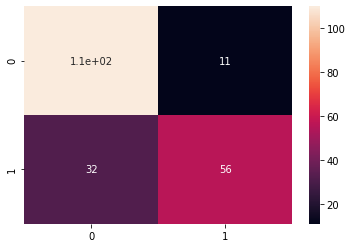

In [0]:
import seaborn as sns

cm = pd.DataFrame(confusion_matrix(y_test, lgbm3_predict))
sns.heatmap(cm, annot = True)

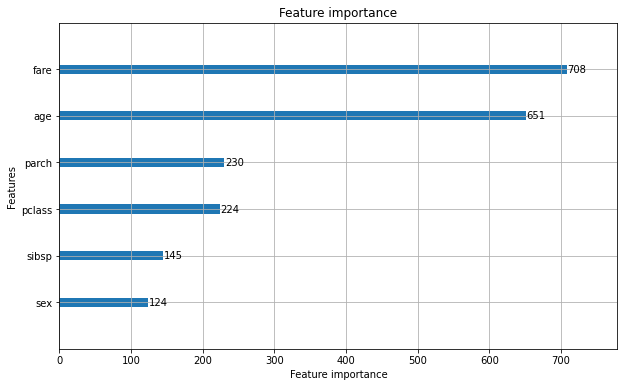

In [0]:
fig, ax = plt.subplots(figsize = (10, 6))
plot_importance(lgbm3, ax = ax)